In [462]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
pd.set_option("display.max_columns", None)
from functions import *
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (8,6)

In [463]:
data = create_data('train.pkl')

In [453]:
# data_train, data_test = train_test_split(data, test_size=0.2)

# Features analysis

In [454]:
data.describe()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,harvest_mean,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_mean,planter_std
count,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,1.053600e+04,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,1.053600e+04,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,1.053600e+04,1.053600e+04,10536.000000,1.053600e+04,10536.000000,10536.000000
mean,0.203087,0.220602,0.133807,0.033178,224.726271,8.300462e-08,0.341343,3.648716,3.654709,1.164724,0.416176,0.180642,0.076665,0.013403,0.000920,7.518674e-07,0.000002,0.000003,0.000003,0.000002,0.000003,0.000019,0.002668,0.300569,0.065114,1.152750e-07,1.103351e-06,0.000098,3.830799e-05,35162.378046,1013.139056
std,0.329492,0.344606,0.318225,0.138439,39.268998,8.520010e-06,1.230351,2.628220,2.009006,1.204029,0.677052,0.567760,0.476771,0.115946,0.049606,7.717544e-05,0.000250,0.000328,0.000289,0.000205,0.000177,0.000641,0.052130,0.080574,0.029713,9.122638e-07,3.931600e-06,0.000050,5.070138e-05,1733.244451,801.334766
min,0.000000,0.000000,0.000000,0.000000,50.441578,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067838,0.010473,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,25389.802734,0.000000
25%,0.000000,0.000316,0.000000,0.000000,204.053043,0.000000e+00,0.000009,1.312170,2.276084,0.123010,0.000948,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251965,0.042334,0.000000e+00,0.000000e+00,0.000059,3.103065e-08,34123.598633,413.369881
50%,0.032982,0.061903,0.000000,0.000000,231.903946,0.000000e+00,0.000920,3.410753,3.640636,0.887599,0.048480,0.001815,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290847,0.058916,0.000000e+00,8.085457e-08,0.000126,8.573198e-06,35504.556641,775.940338
75%,0.292389,0.292154,0.085702,0.000000,250.606483,0.000000e+00,0.048927,5.814094,5.068253,1.861582,0.574530,0.056435,0.003638,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.337043,0.083900,5.807980e-08,8.931153e-07,0.000136,7.680413e-05,36290.360352,1449.397980
max,3.356656,2.798137,3.317399,2.489798,366.780670,8.745366e-04,9.500000,9.500000,9.323266,9.422462,7.995107,8.112792,7.618436,5.700000,4.281520,7.921675e-03,0.025677,0.033680,0.029643,0.021009,0.017836,0.058814,2.769782,0.786439,0.221210,4.665107e-05,1.373312e-04,0.000137,1.373312e-04,39308.273438,7586.876465


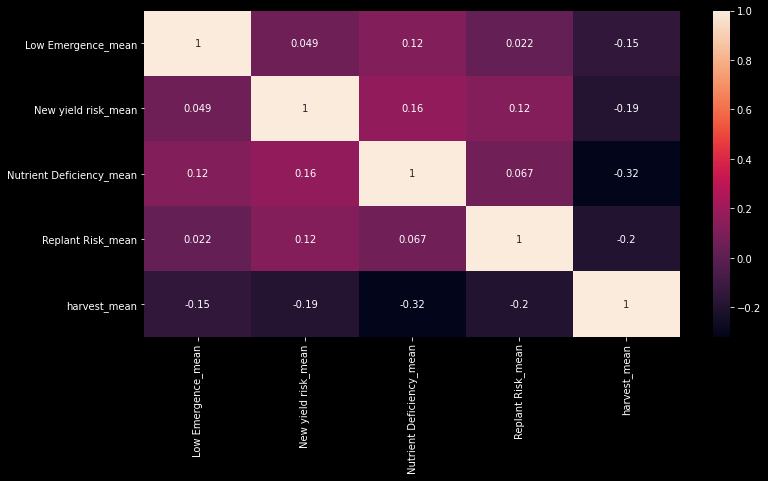

In [455]:
corr_matrix(data, ['Low Emergence_mean', 'New yield risk_mean', 'Nutrient Deficiency_mean',
       'Replant Risk_mean', 'harvest_mean'])

### the highest correlation is between harvest_mean and Nutrient Deficiency risk

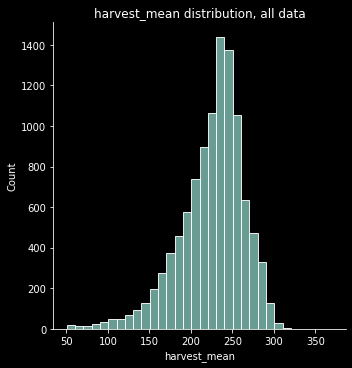

In [456]:
hist_feature(data, 'harvest_mean')

#### mainly harvest_mean is concentrated on 210-260

'linear connection between Low Emergence_mean and harvest_mean'

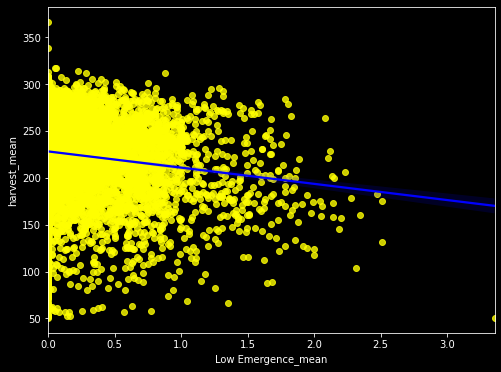

In [457]:
plot_feature_scatter(data, 'Low Emergence_mean', 'harvest_mean')

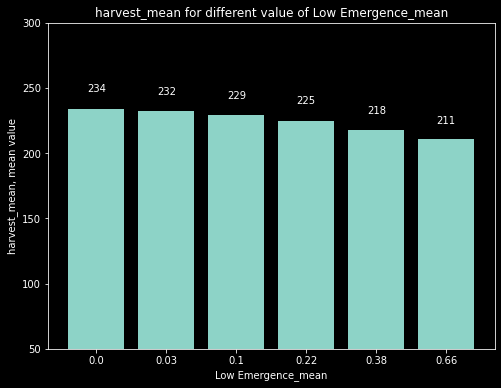

In [409]:
plot_features_dist(data, 'Low Emergence_mean', 'harvest_mean')

#### there is connection between Low Emergence_mean and harvest_mean, the higher  Low Emergence_mean, the lower  harvest mean 

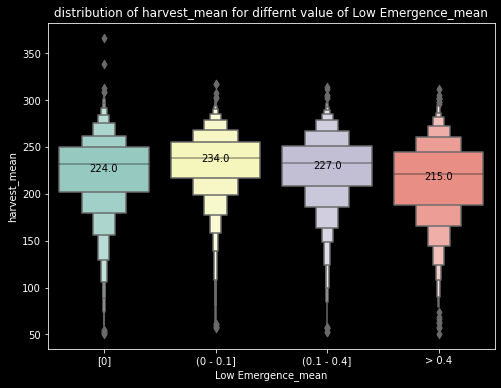

In [413]:
plot_distribution(data, 'Low Emergence_mean', 'harvest_mean')

####  1. with 0 Low Emergence risk harvest_mean is lower than Low Emergence risk with (0.0 - 0.1]
#### 2. harvest_mean is lower when Low Emergence risk is higher 0.1

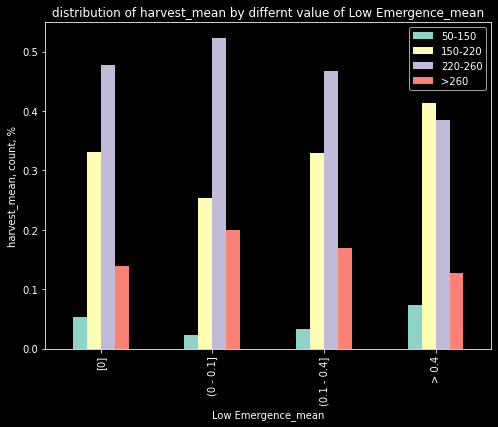

In [414]:
plot_distribution_for_groups(data, 'Low Emergence_mean', 'harvest_mean')

#### 220-260 and >260 groups share increase, but 50-150 and 150-200 groups share decrease along with the decrease of Low Emergence risk

'linear connection between New yield risk_mean and harvest_mean'

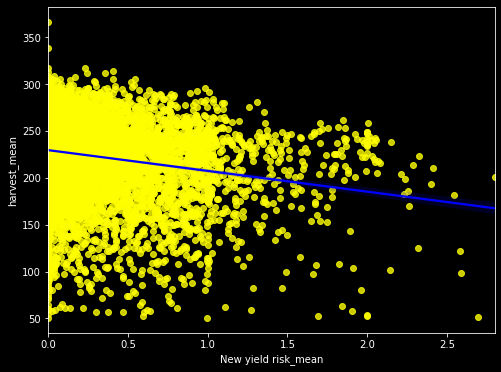

In [416]:
plot_feature_scatter(data, 'New yield risk_mean', 'harvest_mean')

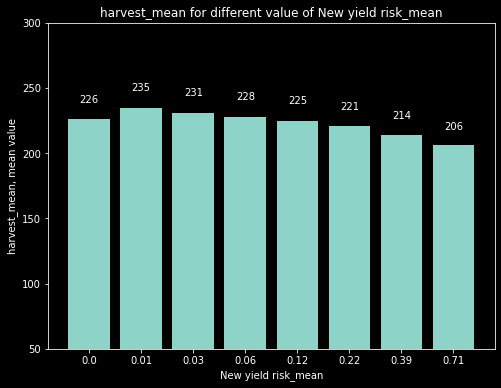

In [417]:
plot_features_dist(data, 'New yield risk_mean', 'harvest_mean')

#### there is connection between Low Emergence_mean and harvest_mean, the higher  New yield risk, the lower  harvest mean 

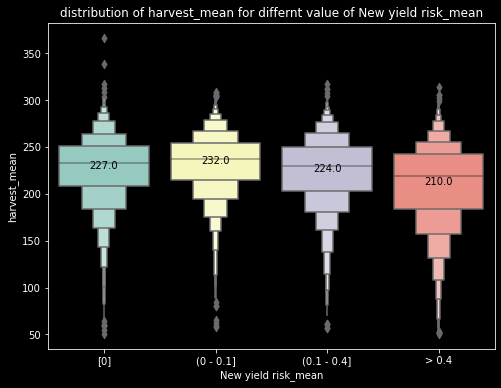

In [418]:
plot_distribution(data, 'New yield risk_mean', 'harvest_mean')

####  1. with 0 New yield risk harvest_mean is lower than New yield risk with (0.0 - 0.1]
#### 2. harvest_mean is lower when New yield risk is higher 0.1

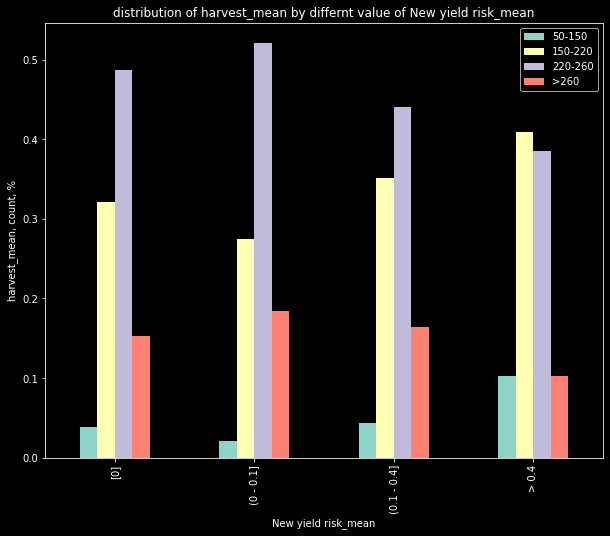

In [209]:
plot_distribution_for_groups(data, 'New yield risk_mean', 'harvest_mean')

#### 220-260 and >260 groups share increase, but 50-150 and 150-200 groups share decrease along with the decrease of New yield risk

'linear connection between Nutrient Deficiency_mean and harvest_mean'

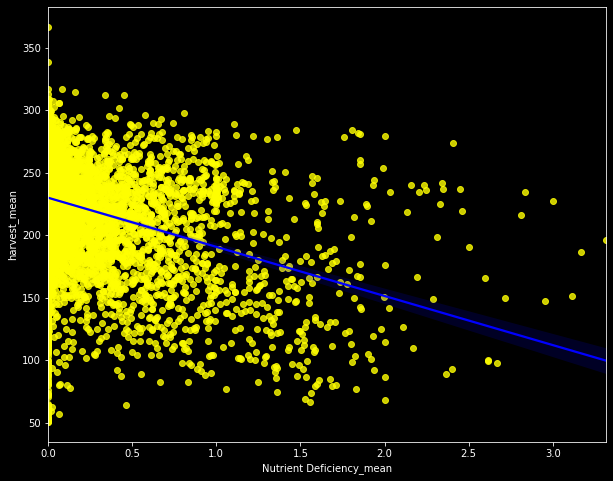

In [210]:
plot_feature_scatter(data, 'Nutrient Deficiency_mean', 'harvest_mean')

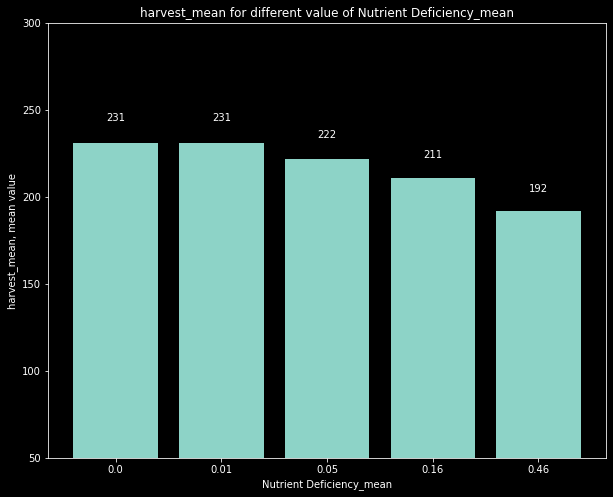

In [211]:
plot_features_dist(data, 'Nutrient Deficiency_mean', 'harvest_mean')

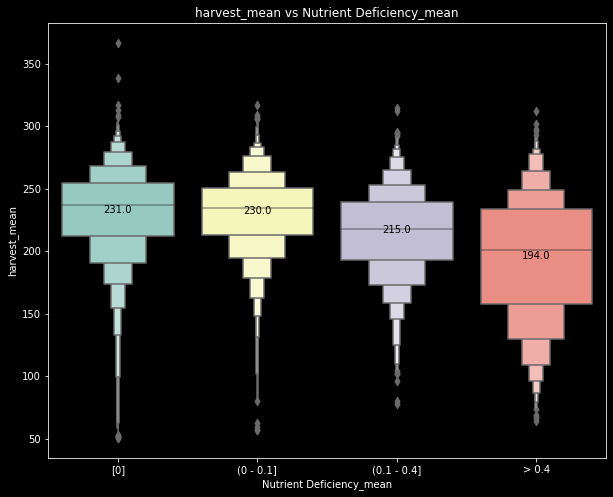

In [212]:
plot_distribution(data, 'Nutrient Deficiency_mean', 'harvest_mean')

#### the connection between Nutrient Deficiency and harvest is clearly expressed, the higher  Nutrient Deficiency risk, the lower  harvest mean 

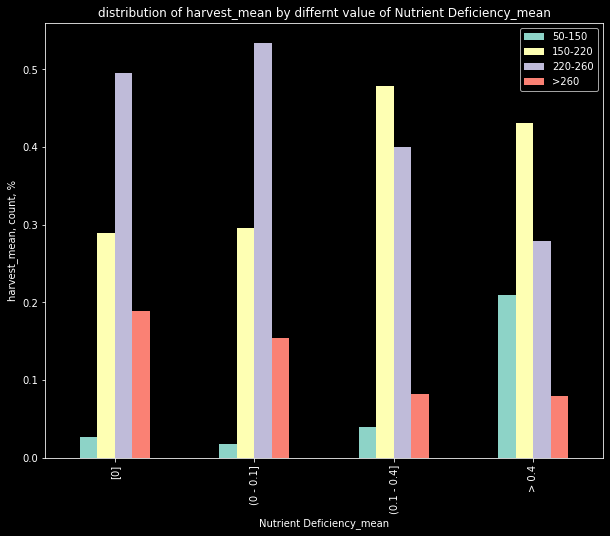

In [213]:
plot_distribution_for_groups(data, 'Nutrient Deficiency_mean', 'harvest_mean')

#### 220-260 and >260 groups share increase, but 50-150 and 150-200 groups share decrease along with the decrease of Nutrient Deficiency risk

'linear connection between Replant Risk_mean and harvest_mean'

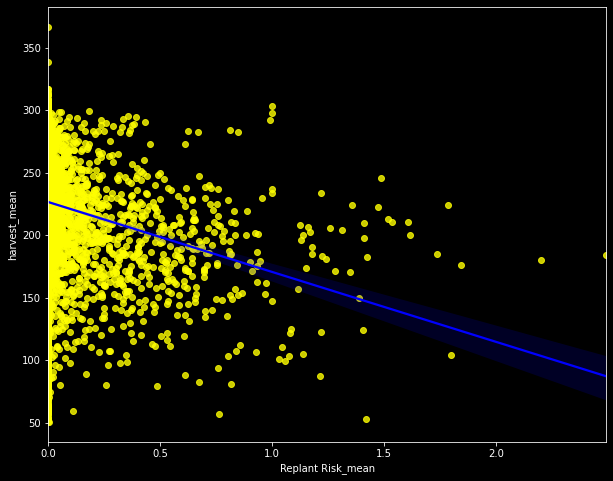

In [214]:
plot_feature_scatter(data, 'Replant Risk_mean', 'harvest_mean')

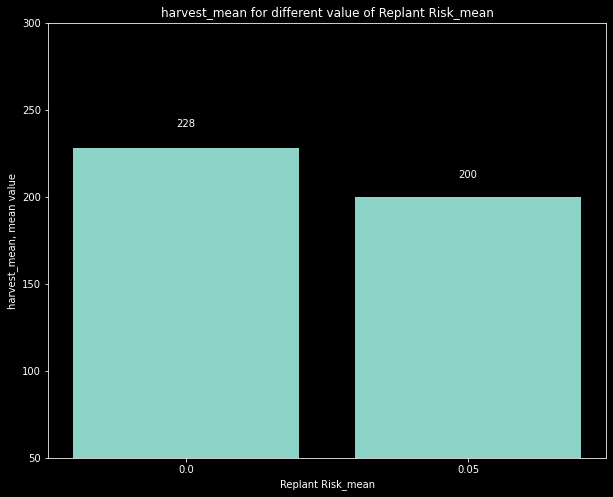

In [215]:
plot_features_dist(data, 'Replant Risk_mean', 'harvest_mean')

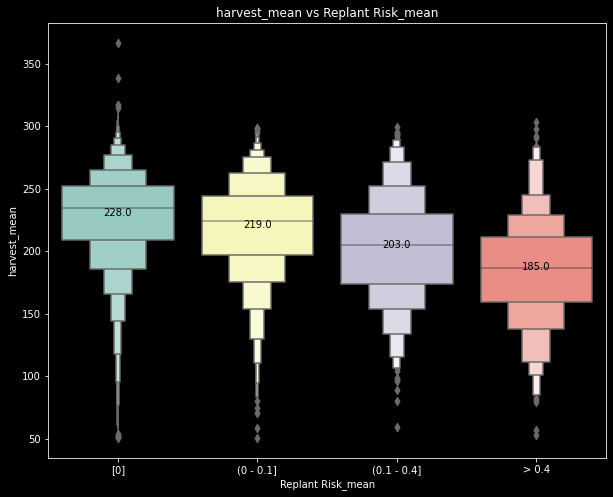

In [216]:
plot_distribution(data, 'Replant Risk_mean', 'harvest_mean')

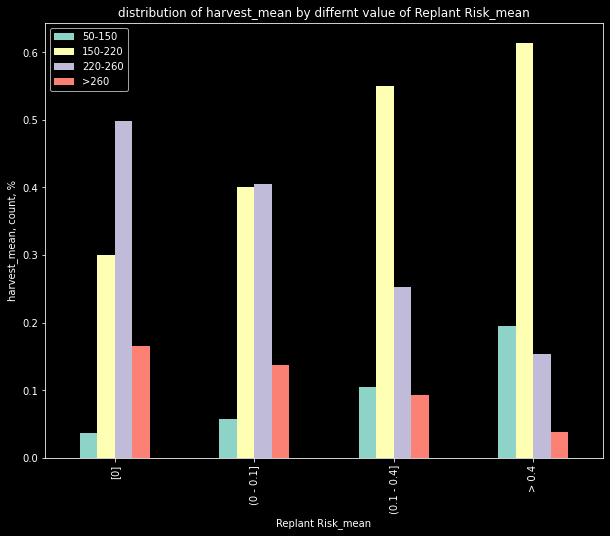

In [217]:
plot_distribution_for_groups(data, 'Replant Risk_mean', 'harvest_mean')

#### There is connection betwwen harvest and Replant Risk. 220-260 and >260 groups share increase, but 50-150 and 150-200 groups share decrease along with the decrease of Replant Risk risk
#### disadvantage is that the 80% of Replant Risk risk is 0

In [218]:
# with open("kmeans_model1.pkl", "wb") as f:
#     pickle.dump(kmeans, f)

In [219]:
# with open("kmeans_model1.pkl", "rb") as f:
#     kmeans_model = pickle.load(f)

In [428]:
def plot_clusters(data, feature_list):
    with open("kmeans_model1.pkl", "rb") as f:
        kmeans_model = pickle.load(f)
    sc = pickle.load(open('scaler.pkl','rb'))
    scale_data = sc.transform(data[feature_list])
    data['cluster'] = kmeans_model.predict(scale_data)
    data_cluster={}
    for i in np.unique(data.cluster):
        data_cluster[i] = data[data['cluster'] == i]
    print(data_cluster.keys())
    table = {}
    for j in feature_list:
        listt = []
        for i in range(5):
            listt.append(data_cluster[i][j].mean())
        listt.append(data[j].mean())
        table[j] = listt
    table
    groups = ['cluster1', 'cluster2','cluster3', 'cluster4','cluster5', "All Data"]
    plotdata = pd.DataFrame({
    f'{feature_list[0]}': table[feature_list[0]],
    f'{feature_list[1]}': table[feature_list[1]],
    f'{feature_list[2]}': table[feature_list[2]],
    f'{feature_list[3]}': table[feature_list[3]]
    },
    index = groups)
    plotdata.plot(kind="bar")
    plt.title("Cluster Analysis")
    plt.ylabel('alert features, mean')
    axes2 = plt.twinx()
    axes2.plot(groups, table['harvest_mean'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
    axes2.set_ylabel('harvest_mean, mean')
    plt.ylim(180, 250)



#### cluster analysis was done to understand if there are connections of independent variable where harvest value differs from the average 
#### 5 groups are seperated. 
#### the analysis shows that the higher alert features values in the group, the lower harvest mean
#### and in the group1 when all features' value is less than the average, the harvest mean is the highest.

dict_keys([0, 1, 2, 3, 4])


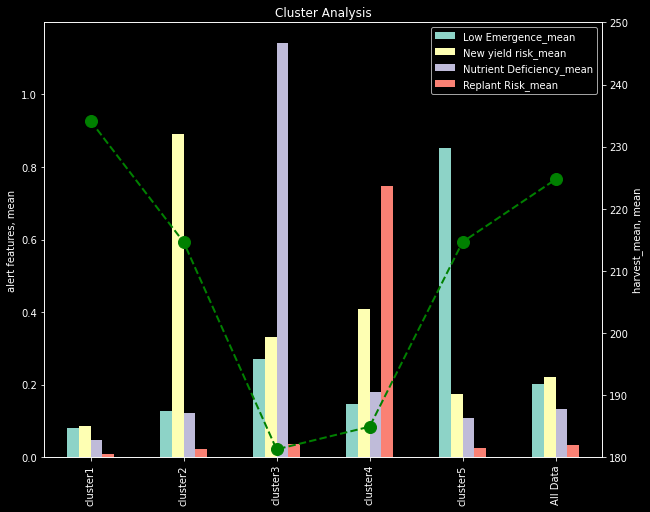

In [222]:
plot_clusters(data, ['Low Emergence_mean', 'New yield risk_mean', 'Nutrient Deficiency_mean',
       'Replant Risk_mean', 'harvest_mean'])

##### harvest mean is analyzed  for differen combination of the alert features

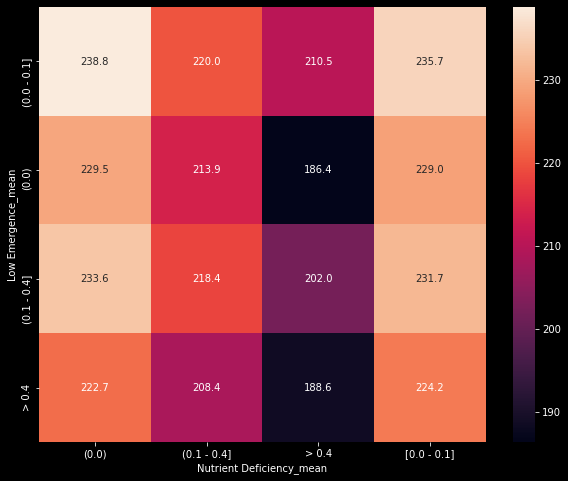

In [233]:
tabel_between_features(data, 'Low Emergence_mean', 'Nutrient Deficiency_mean')

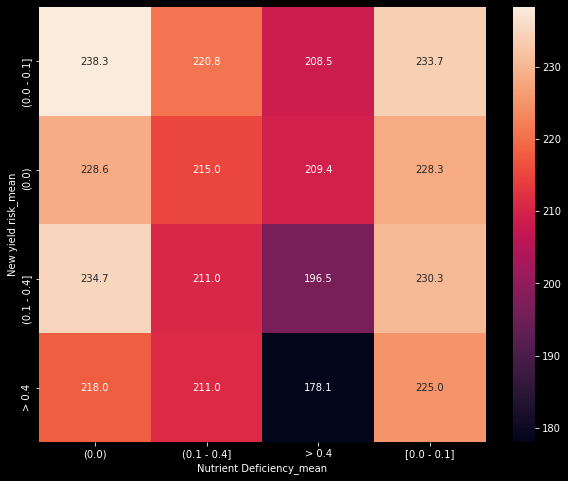

In [234]:
tabel_between_features(data, 'New yield risk_mean', 'Nutrient Deficiency_mean')

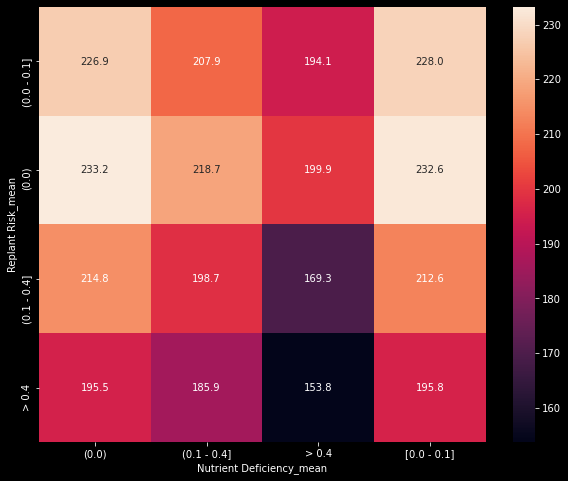

In [235]:
tabel_between_features(data, 'Replant Risk_mean', 'Nutrient Deficiency_mean')

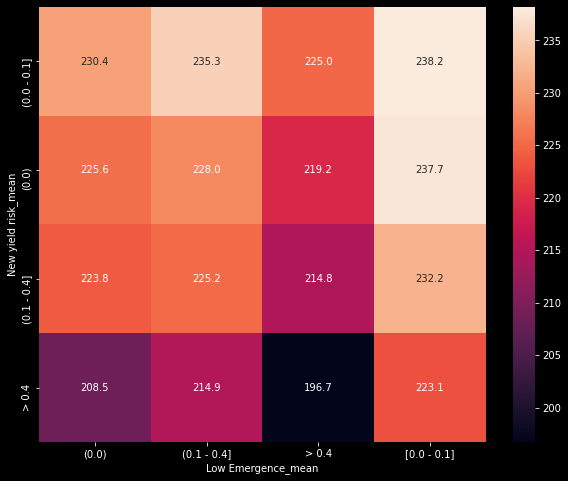

In [236]:
tabel_between_features(data, 'New yield risk_mean', 'Low Emergence_mean')

In [458]:
# tabel_between_features(data, 'Replant Risk_mean', 'Low Emergence_mean')

In [459]:
# tabel_between_features(data, 'Replant Risk_mean', 'New yield risk_mean')

#### based on cluster analysis and the analysis of combinations of independent features, new features are created which are correlated with harvest_mean


In [465]:
data['Nutrient > 0.4 and Emergence > 0.1'] = np.where((data['Nutrient Deficiency_mean'] > 0.4)
                              & (data['Low Emergence_mean'] > 0.1), 1, 0)
data['Nutrient risk more than 0.8'] = np.where((data['Nutrient Deficiency_mean']  > 0.8), 1, 0)
data['all alerts less than 0.1'] = np.where((data.iloc[:,:4].sum(axis = 1) < 0.1), 1, 0)
data['Replant and yield risk more than 0.1'] = np.where((data['Replant Risk_mean'] > 0.1) 
                             & (data['New yield risk_mean'] > 0.1), 1, 0)
data['all alerts more than 0.4'] = np.where((data.iloc[:,:4].sum(axis = 1) > 0.4), 1, 0)

In [466]:
new_feature_list = ['Nutrient > 0.4 and Emergence > 0.1', 'Nutrient risk more than 0.8',
       'all alerts less than 0.1', 'Replant and yield risk more than 0.1',
       'all alerts more than 0.4']

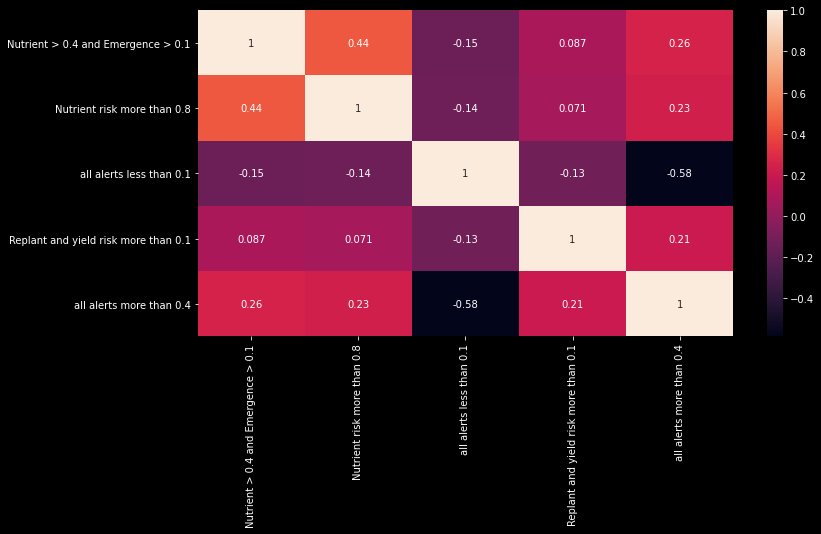

In [231]:
corr_matrix(data, new_feature_list)

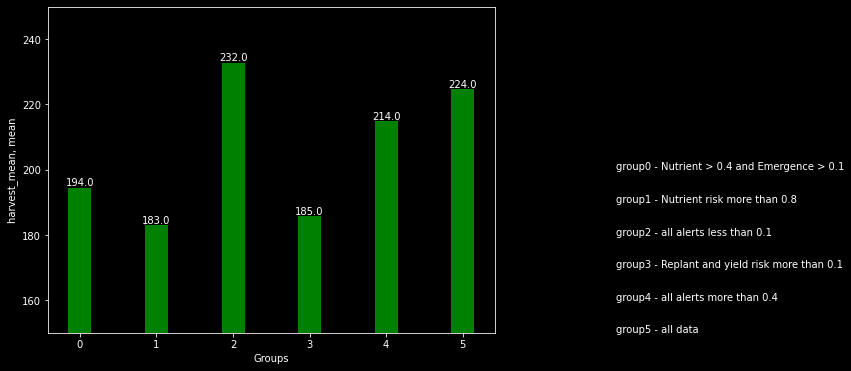

In [467]:
plot_sepeartaed_groups(data, new_feature_list)

#### the higher alert features value the lower harvest mean and vice versa

### features importance: information gain based on entropy

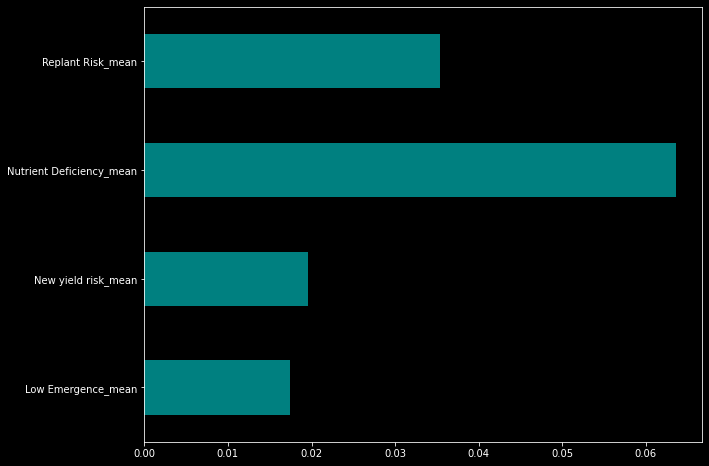

In [239]:
feature_imp(data[['Low Emergence_mean', 'New yield risk_mean', 'Nutrient Deficiency_mean',
       'Replant Risk_mean']], data['harvest_mean'])

## outlier detection

In [247]:
feauture_list = ['Low Emergence_mean', 'New yield risk_mean', 'Nutrient Deficiency_mean',
       'Replant Risk_mean']

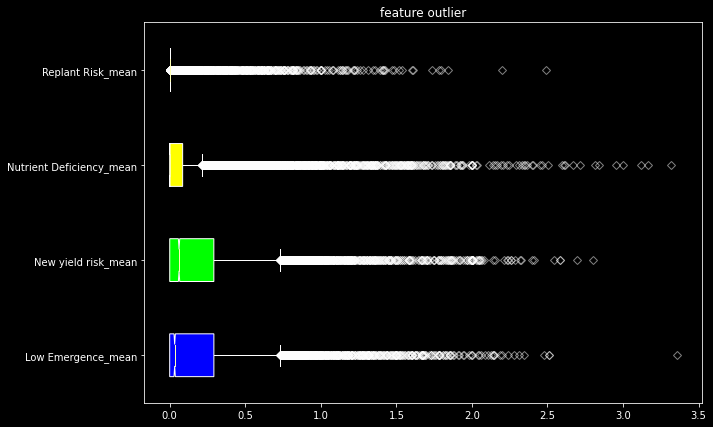

In [248]:
feature_outlier(data, feauture_list)

### outlier removeal based on IQR

In [432]:
df = data.reset_index()
df_nooutlier =  iqr(df, feauture_list)
df_outlier = df[~df.index.isin(df_nooutlier.index)]

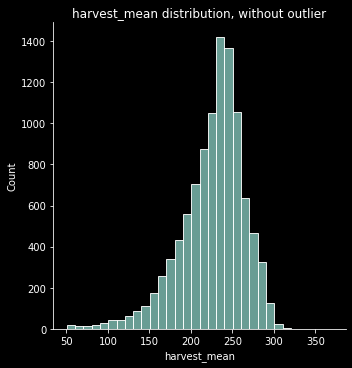

In [433]:
hist_feature(df_nooutlier, 'harvest_mean', title = 'without outlier')

outlier count: 280


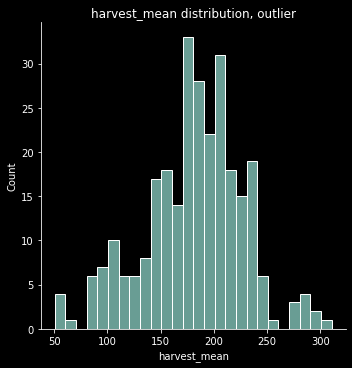

In [434]:
print(f'outlier count: {df_outlier.shape[0]}')
hist_feature(df_outlier, 'harvest_mean', title = 'outlier')


## Other features

#### ANALYSIS OF NDVI AND PLANTER FEATURES

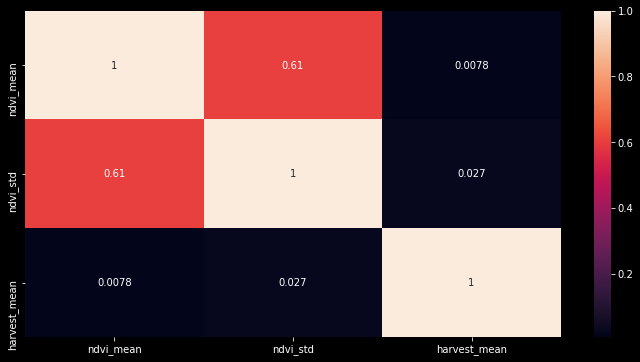

In [252]:
corr_matrix(data, ['ndvi_mean', 'ndvi_std', 'harvest_mean'])

'linear connection between ndvi_std and harvest_mean'

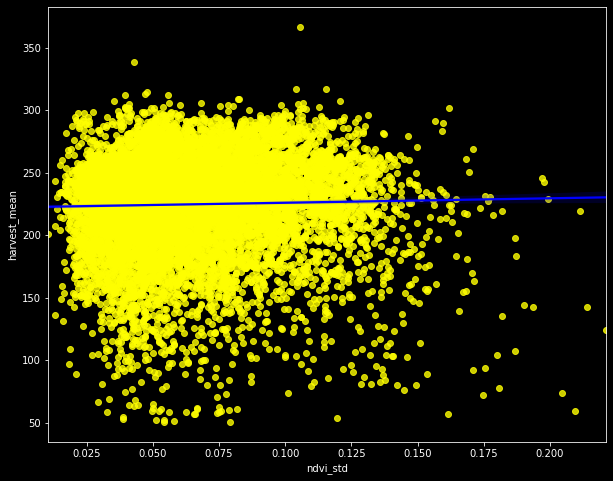

In [253]:
plot_feature_scatter(data, 'ndvi_std', 'harvest_mean')

'linear connection between ndvi_mean and harvest_mean'

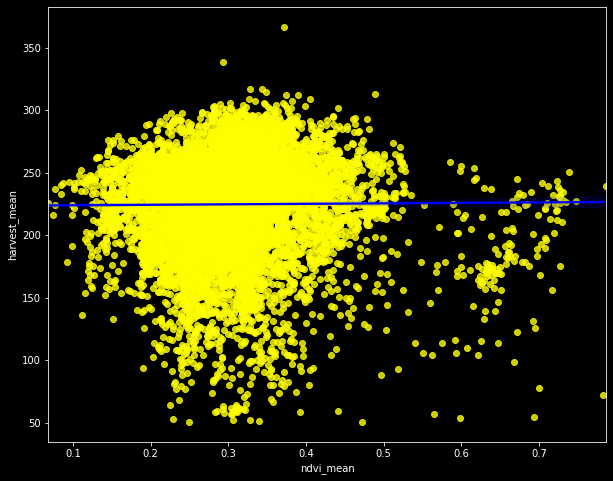

In [254]:
plot_feature_scatter(data, 'ndvi_mean', 'harvest_mean')

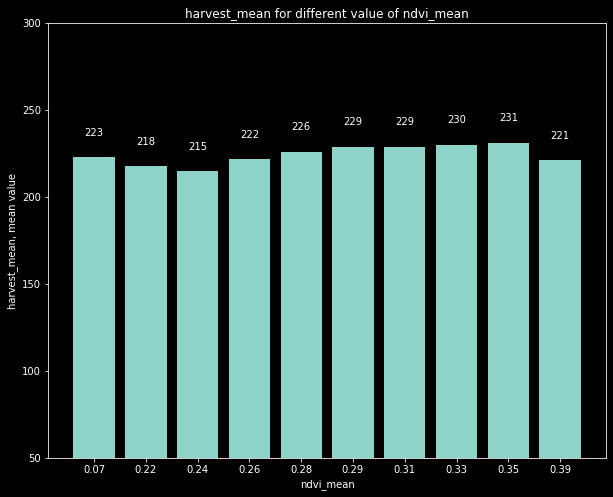

In [255]:
plot_features_dist(data, 'ndvi_mean', 'harvest_mean')

In [435]:
ndvi_feature_list = ['ndvi_hist_1','ndvi_hist_2', 'ndvi_hist_3', 'ndvi_hist_4','ndvi_hist_5', 'ndvi_hist_6', 'ndvi_hist_7', 
                      'ndvi_hist_8', 'ndvi_hist_10', 'ndvi_hist_11', 'ndvi_hist_12', 'ndvi_hist_13', 'ndvi_hist_14', 
               'ndvi_hist_15', 'ndvi_hist_16', 'ndvi_hist_17','ndvi_hist_18', 'ndvi_hist_9', 'ndvi_mean', 'ndvi_std']

In [436]:
scale_norm_ndvi = scaling(data[ndvi_feature_list])
X_ndvi = scale_norm_ndvi.transform(data[ndvi_feature_list])
pca_ndvi, principalDf_ndvi = pca_method(X_ndvi, data[ndvi_feature_list].index, 5)

In [437]:
# plot_pca(pca_ndvi)

In [438]:
planter_feature_list = ['planter_hist_2', 'planter_hist_3', 'planter_hist_4', 'planter_hist_5',  'planter_mean', 'planter_std']

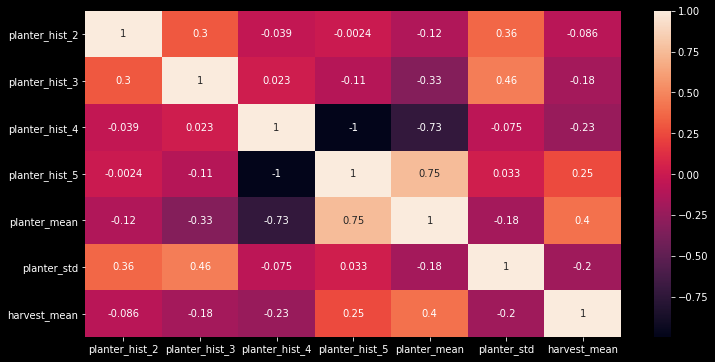

In [439]:
corr_matrix(data, ['planter_hist_2', 'planter_hist_3', 'planter_hist_4', 'planter_hist_5',  'planter_mean', 'planter_std', 'harvest_mean'])

'linear connection between planter_mean and harvest_mean'

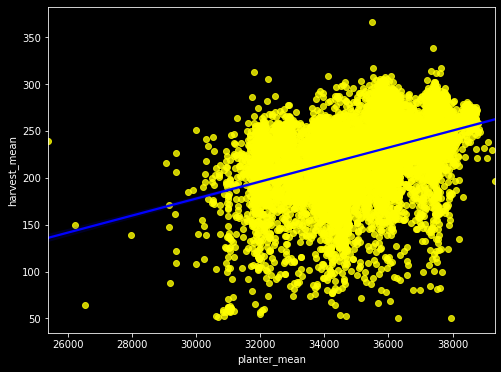

In [440]:
plot_feature_scatter(data, 'planter_mean', 'harvest_mean')

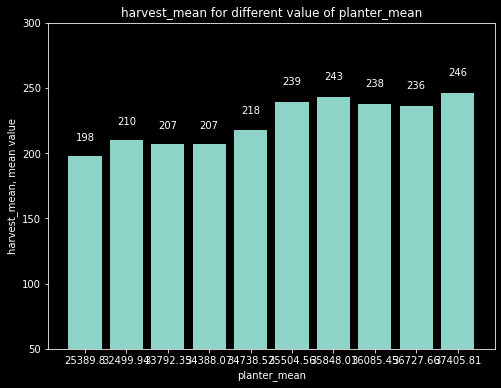

In [441]:
plot_features_dist(data, 'planter_mean', 'harvest_mean')

In [265]:
scale_norm_plant = scaling(data[planter_feature_list])
X_plant = scale_norm_plant.transform(data[planter_feature_list])
pca_plant, principalDf_plant = pca_method(X_plant, data[planter_feature_list].index, 3)

In [267]:
# plot_pca(pca_plant)

In [268]:
data_other = pd.concat([principalDf_ndvi, principalDf_plant, data['harvest_mean']], axis=1)

In [269]:
data_other.columns = ['PC_ndvi1','PC_ndvi2','PC_ndvi3','PC_ndvi4','PC_ndvi5', 
                      'PC_plant1', 'PC_plant2', 'PC_plant3', 'harvest_mean']

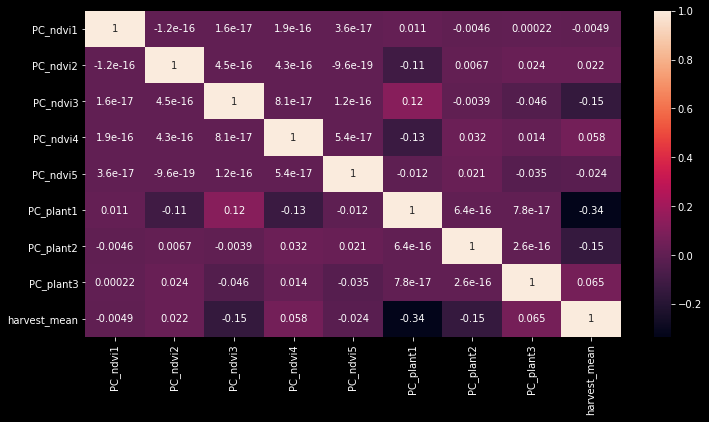

In [270]:
corr_matrix(data_other, data_other.columns)

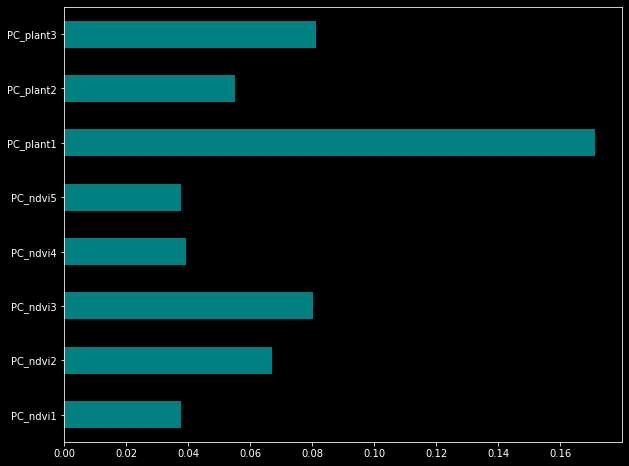

In [271]:
feature_imp(data_other[['PC_ndvi1','PC_ndvi2','PC_ndvi3','PC_ndvi4','PC_ndvi5', 
                      'PC_plant1', 'PC_plant2', 'PC_plant3']], data_other['harvest_mean'])

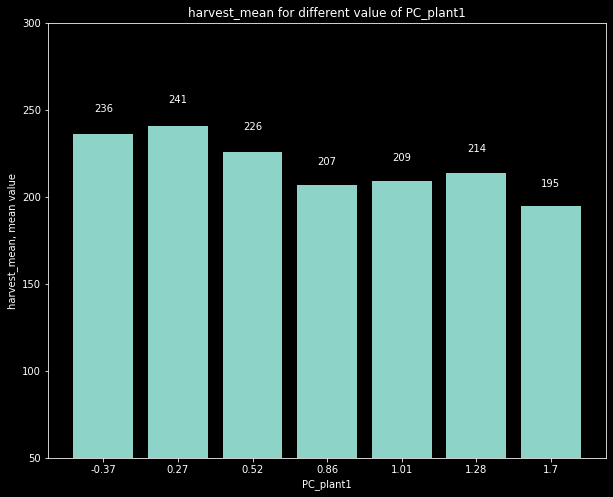

In [272]:
plot_features_dist(data_other, 'PC_plant1', 'harvest_mean')

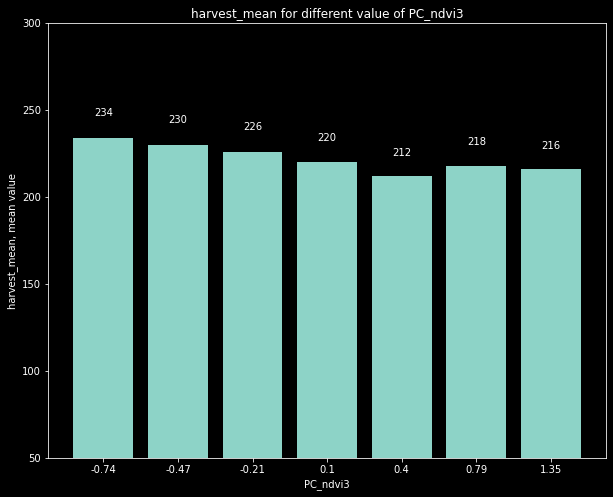

In [273]:
plot_features_dist(data_other, 'PC_ndvi3', 'harvest_mean')

In [ ]:
# Mode